Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Aperçu des données:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


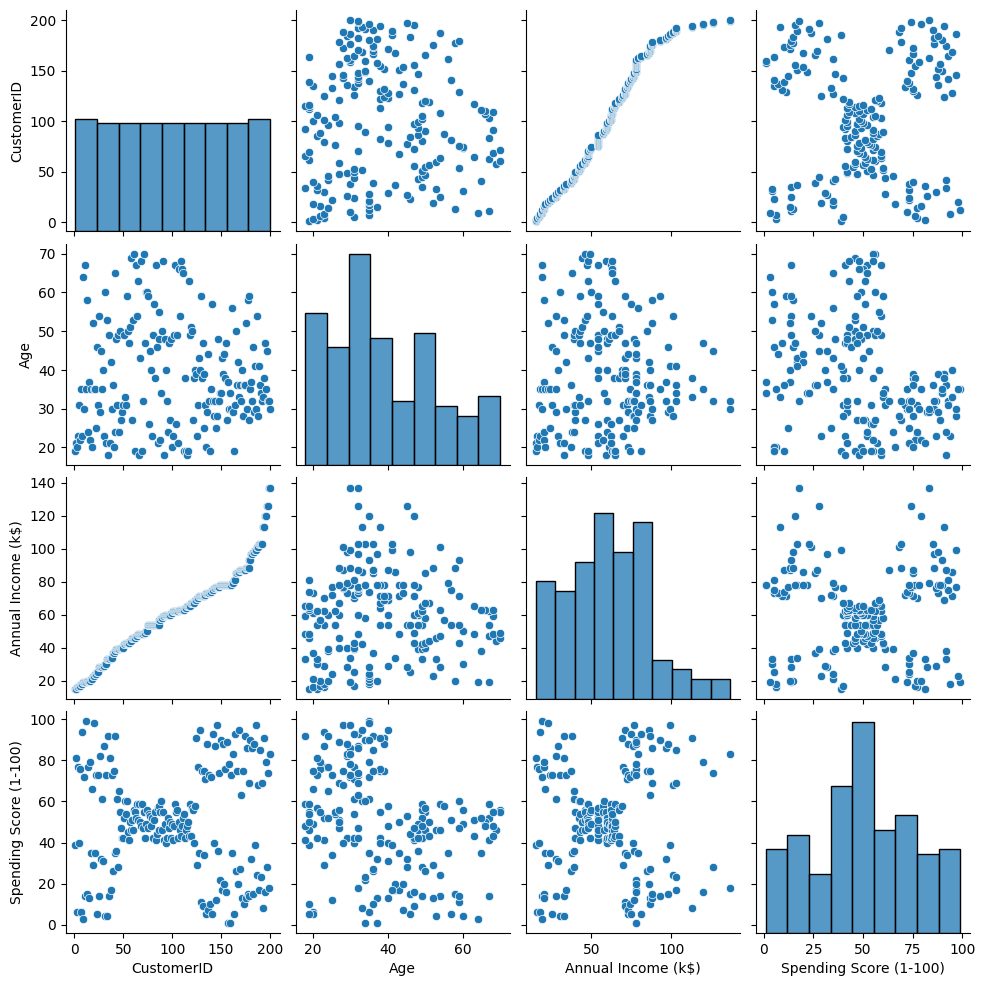

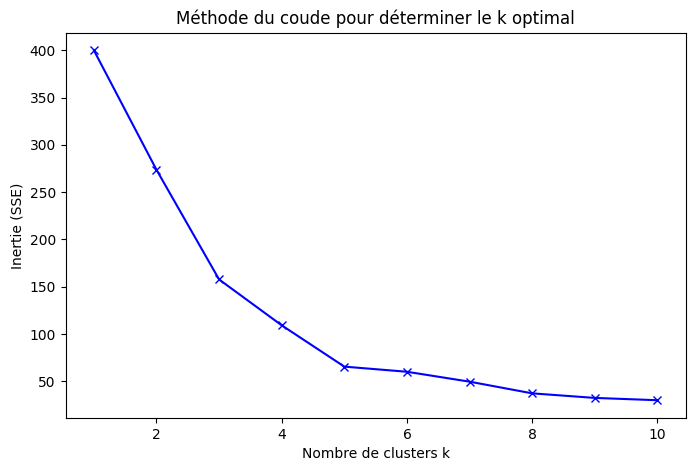

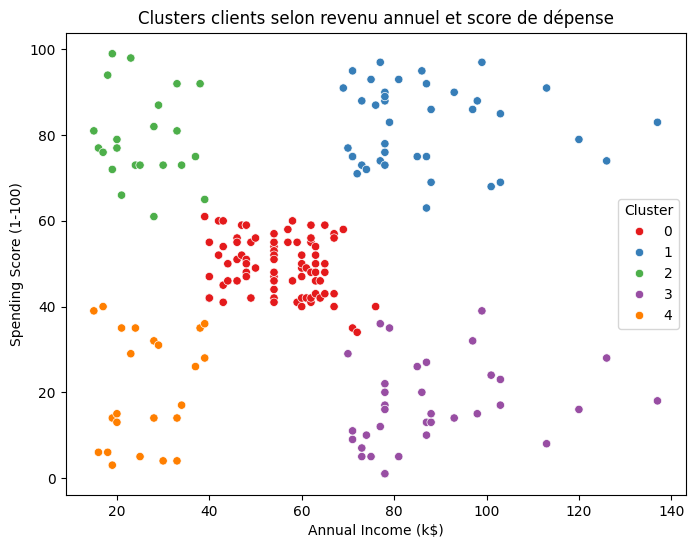

Silhouette Score pour k=5 : 0.5547

Moyennes des caractéristiques par cluster :


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [2]:
# 1. Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

# 3. Charger le dataset (exemple avec Mall_Customers.csv)
file_path = '/content/drive/MyDrive/TP_ML/Mall_Customers.csv'
df = pd.read_csv(file_path)

print("Aperçu des données:")
display(df.head())

# 4. Exploration rapide
print(df.describe())

sns.pairplot(df)
plt.show()

# 5. Prétraitement : Normalisation des données numériques
features = ['Annual Income (k$)', 'Spending Score (1-100)']  # adapter selon ton dataset
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Recherche du nombre optimal de clusters avec la méthode du coude
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour déterminer le k optimal')
plt.show()

# 7. Choix du nombre de clusters (par exemple k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 8. Ajouter les labels de clusters au dataframe original
df['Cluster'] = clusters

# 9. Visualisation des clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Clusters clients selon revenu annuel et score de dépense')
plt.show()

# 10. Évaluation du clustering avec silhouette score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score pour k={k_optimal} : {score:.4f}")

# 11. Analyse des clusters : moyenne des caractéristiques par cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nMoyennes des caractéristiques par cluster :")
display(cluster_summary)
